In [1]:
import pandas as pd

#Loding Datasets

# Load Netflix dataset
netflix_df = pd.read_csv('netflix_titles.csv')

# Load IMDb dataset
imdb_df = pd.read_csv('imdb_top_1000.csv')

In [2]:
# Making Column names lower Case
netflix_df.columns = netflix_df.columns.str.lower()
imdb_df.columns = imdb_df.columns.str.lower()

In [3]:
# 1. Checking Column Names 
print("Netflix Columns:", netflix_df.columns)
print("IMDb Columns:", imdb_df.columns)

Netflix Columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
IMDb Columns: Index(['poster_link', 'series_title', 'released_year', 'certificate',
       'runtime', 'genre', 'imdb_rating', 'overview', 'meta_score', 'director',
       'star1', 'star2', 'star3', 'star4', 'no_of_votes', 'gross'],
      dtype='object')


In [4]:
# Printing a Few Rows To see data
print(netflix_df['title'].head())
print(imdb_df['series_title'].head())

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object
0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
3      The Godfather: Part II
4                12 Angry Men
Name: series_title, dtype: object


In [5]:
# Checking if 'title' is present in both DataFrames before merging if not inform.
if 'title' in netflix_df.columns and 'title' in imdb_df.columns:
    # Merge datasets on 'title'
    merged_df = pd.merge(netflix_df, imdb_df[['title', 'series_title']], on='title', how='inner')
    # Print the first few rows of the merged dataset
    print(merged_df.head())
else:
    print("The 'title' column is not present in both DataFrames.")

The 'title' column is not present in both DataFrames.


In [6]:
#Not present in Idmb dataset
#'series_title' is the correct column in IMDb
#Assinging new column name for idmb datatset.
imdb_df['title'] = imdb_df['series_title']  

In [7]:
# Re-checking if 'title' is present in both DataFrames before merging if yes merge if no,
#print("The 'title' column is not present in both DataFrames.")
if 'title' in netflix_df.columns and 'title' in imdb_df.columns:
    # Merge datasets on 'title'
    merged_df = pd.merge(netflix_df, imdb_df[['title', 'series_title']], on='title', how='inner')
    # Print the first few rows of the merged dataset
    print(merged_df.head())
else:
    print("The 'title' column is not present in both DataFrames.")

  show_id   type                        title          director  \
0     s42  Movie                         Jaws  Steven Spielberg   
1     s49  Movie                 Training Day     Antoine Fuqua   
2    s140  Movie           Do the Right Thing         Spike Lee   
3    s167  Movie  Once Upon a Time in America      Sergio Leone   
4    s192  Movie                   Wind River   Taylor Sheridan   

                                                cast  \
0  Roy Scheider, Robert Shaw, Richard Dreyfuss, L...   
1  Denzel Washington, Ethan Hawke, Scott Glenn, T...   
2  Danny Aiello, Ossie Davis, Ruby Dee, Richard E...   
3  Robert De Niro, James Woods, Elizabeth McGover...   
4  Jeremy Renner, Elizabeth Olsen, Jon Bernthal, ...   

                                 country          date_added  release_year  \
0                          United States  September 16, 2021          1975   
1                          United States  September 16, 2021          2001   
2                         

In [8]:
# Save merged_df to a CSV file
merged_df.to_csv('merged_data.csv', index=False)


In [9]:
#After done merging datasets I saved the new "merged_df" to a csv file and will now work with the new merged_df


In [10]:
import pandas as pd

#Loding Datasets

# Load Merged dataset and call it past_df
past_df = pd.read_csv('merged_data.csv')


In [11]:
# Exploring the data

# Display the first few rows of the dataset
print(past_df.head())

# Check basic information about the dataset
print(past_df.info())

# Check summary statistics
print(past_df.describe())


  show_id   type                        title          director  \
0     s42  Movie                         Jaws  Steven Spielberg   
1     s49  Movie                 Training Day     Antoine Fuqua   
2    s140  Movie           Do the Right Thing         Spike Lee   
3    s167  Movie  Once Upon a Time in America      Sergio Leone   
4    s192  Movie                   Wind River   Taylor Sheridan   

                                                cast  \
0  Roy Scheider, Robert Shaw, Richard Dreyfuss, L...   
1  Denzel Washington, Ethan Hawke, Scott Glenn, T...   
2  Danny Aiello, Ossie Davis, Ruby Dee, Richard E...   
3  Robert De Niro, James Woods, Elizabeth McGover...   
4  Jeremy Renner, Elizabeth Olsen, Jon Bernthal, ...   

                                 country          date_added  release_year  \
0                          United States  September 16, 2021          1975   
1                          United States  September 16, 2021          2001   
2                         

In [12]:
# Handling for missing values (#Previously director had '8' and country '2')
print(past_df.isnull().sum())

show_id         0
type            0
title           0
director        8
cast            0
country         2
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
series_title    0
dtype: int64


In [18]:
# Checking for columns with at least one missing value
columns_with_missing_values = past_df.columns[past_df.isnull().any()]

# Display the columns with missing values and their respective counts
for column in columns_with_missing_values:
    missing_count = past_df[column].isnull().sum()
    print(f"Column '{column}' has {missing_count} missing value(s).")
else:
    print('No longer contains missing values')


No longer contains missing values


In [19]:
# 'country' and 'director' columns had missing values respectively 2:8
# So I handled the missing data using code below.
# N/A stands for not available to counter missing values problem

In [20]:
past_df['country'].fillna(value='N/A', inplace=True) 

In [21]:
past_df['director'].fillna(value='N/A', inplace=True)  

In [22]:
# Displaying the columns with missing values and their respective counts
for column in columns_with_missing_values:
    missing_count = past_df[column].isnull().sum()
    print(f"Column '{column}' has {missing_count} missing value(s).")
else:
    print("No columns with missing values")


No columns with missing values


In [23]:
#Prevoiusly 'country'column had 2 missing values now has 0 and same goes with the 'directory' column which had 8 missing values.

In [24]:
# Save past_df to a CSV file to confirm handling missing values😁
past_df.to_csv('past_df.csv', index=False)

In [25]:
# Checking basic information about the dataset
print(past_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       172 non-null    object
 1   type          172 non-null    object
 2   title         172 non-null    object
 3   director      172 non-null    object
 4   cast          172 non-null    object
 5   country       172 non-null    object
 6   date_added    172 non-null    object
 7   release_year  172 non-null    int64 
 8   rating        172 non-null    object
 9   duration      172 non-null    object
 10  listed_in     172 non-null    object
 11  description   172 non-null    object
 12  series_title  172 non-null    object
dtypes: int64(1), object(12)
memory usage: 17.6+ KB
None


In [26]:
# Checking for unique values in categorical columns
print(past_df['country'].value_counts())
print(past_df['rating'].value_counts())
print(past_df['type'].value_counts())
print(past_df['release_year'].value_counts())

country
United States                                                      73
India                                                              28
United Kingdom                                                      9
United Kingdom, United States                                       5
United States, United Kingdom                                       4
United States, Canada                                               3
New Zealand, United States                                          2
United States, Germany                                              2
N/A                                                                 2
Italy, United States                                                2
Germany, United States                                              2
Hong Kong, United States                                            1
United Kingdom, France, Belgium                                     1
South Africa, United States, New Zealand, Canada                    1
United State

In [27]:
#VISUALIZATIONS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



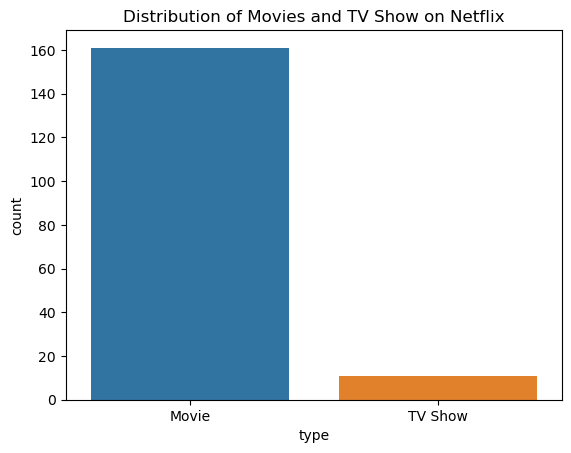

Total Movies on Netflix: 161
Total TV Shows on Netflix: 11
Netflix has a larger collection of movies compared to TV shows.
The bar plot visually represents the distribution of movies and TV shows on Netflix.


In [30]:
#Bar Plot showing the distribution of TV shows and movies on Netflix.
sns.countplot(x='type', data=past_df)
plt.title('Distribution of Movies and TV Show on Netflix')
plt.show()


total_movies = past_df[past_df['type'] == 'Movie'].shape[0]
total_tv_shows = past_df[past_df['type'] == 'TV Show'].shape[0]

print(f'Total Movies on Netflix: {total_movies}')
print(f'Total TV Shows on Netflix: {total_tv_shows}')

if total_movies > total_tv_shows:
    print('Netflix has a larger collection of movies compared to TV shows.')
elif total_movies < total_tv_shows:
    print('Netflix has a larger collection of TV shows compared to movies.')
else:
    print('Netflix has an equal distribution of movies and TV shows.')

# Conclusion based on the visualization
print('The bar plot visually represents the distribution of movies and TV shows on Netflix.')



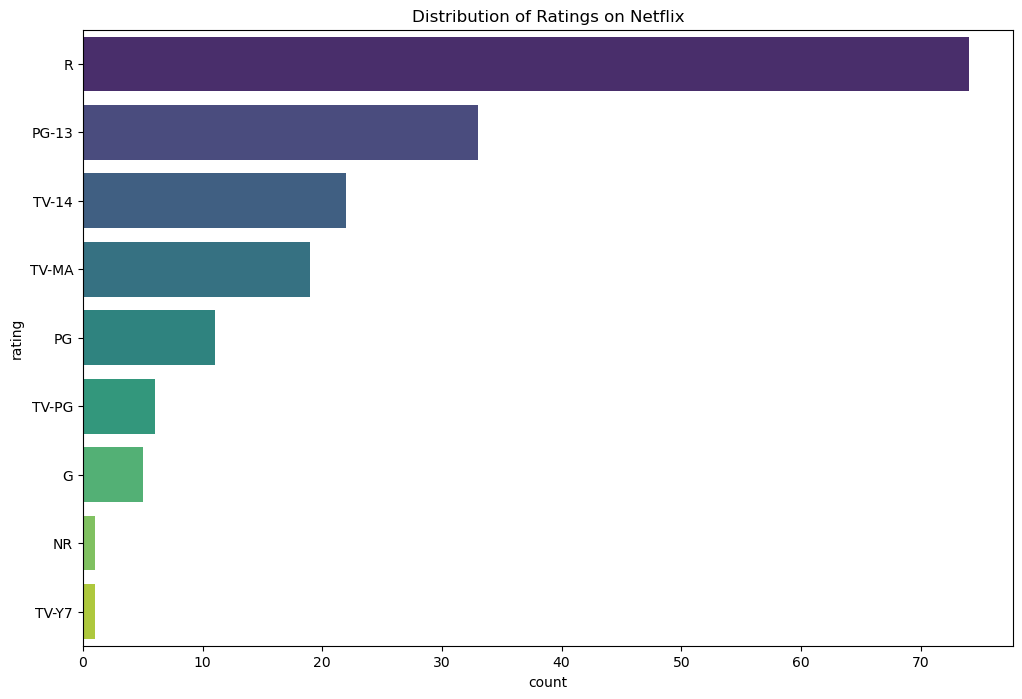

The horizontal bar chart shows the distribution of ratings for content on Netflix.
The most common rating on Netflix is 'R'.
This visualization provides insights into the diversity of content ratings available on Netflix.


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Createing a horizontal bar chart for the 'rating' column in the DataFrame 'past_df'
plt.figure(figsize=(12, 8))
sns.countplot(y='rating', data=past_df, order=past_df['rating'].value_counts().index, palette='viridis')
# Set the title of the plot
plt.title('Distribution of Ratings on Netflix')
# Display the plot
plt.show()

#Statement summarizing the analysis
print("The horizontal bar chart shows the distribution of ratings for content on Netflix.")

#Get the most common rating.
most_common_rating = past_df['rating'].value_counts().idxmax()
print(f"The most common rating on Netflix is '{most_common_rating}'.")

# Print a concluding statement
print("This visualization provides insights into the diversity of content ratings available on Netflix.")


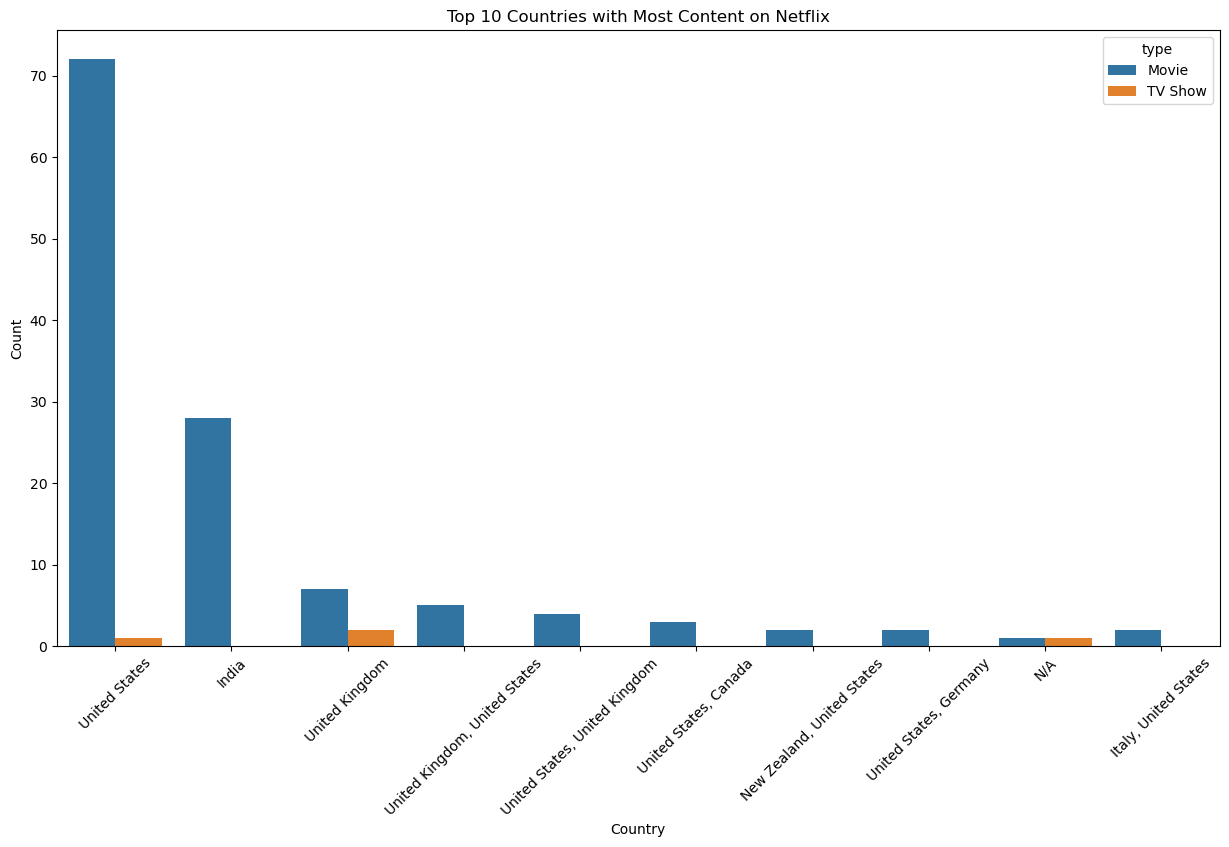

The countplot visualizes the distribution of content types across the top 10 countries with the most content on Netflix.
The most common content type among the top 10 countries is 'Movie'.
This visualization shows the content distribution across different countries on Netflix, showing the most common content type.


In [32]:
    plt.figure(figsize=(15, 8))
    sns.countplot(x='country', hue='type', data=past_df, order=past_df['country'].value_counts().index[:10])
    plt.title('Top 10 Countries with Most Content on Netflix')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
#Statement summarizing the analysis
print("The countplot visualizes the distribution of content types across the top 10 countries with the most content on Netflix.")

#Analysis based on the chart
top_countries = past_df['country'].value_counts().index[:10]
most_common_type = past_df.loc[past_df['country'].isin(top_countries), 'type'].mode().iloc[0]
print(f"The most common content type among the top 10 countries is '{most_common_type}'.")

#Concluding statement
print("This visualization shows the content distribution across different countries on Netflix, showing the most common content type.")


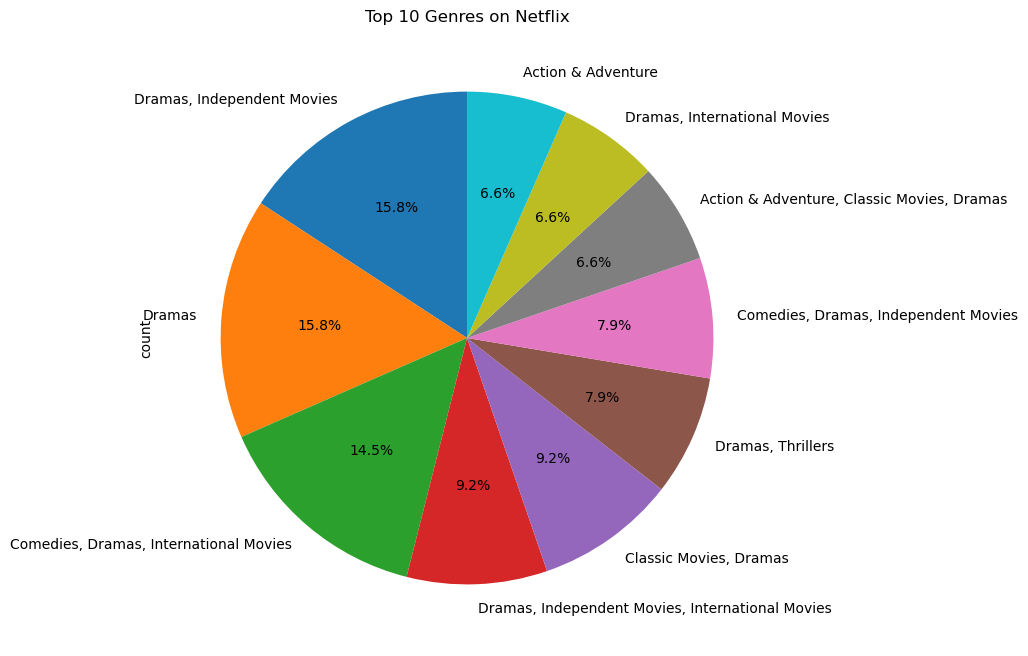

The pie chart represents the distribution of the top 10 genres on Netflix.
The most common genre among the top 10 is 'Dramas, Independent Movies'.
This visualization shows a brief overview of the most popular genres on Netflix, focusing on the top 10 genres.


In [33]:
plt.figure(figsize=(10, 8))
past_df['listed_in'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Genres on Netflix')
plt.show()
#statement summarizing the analysis
print("The pie chart represents the distribution of the top 10 genres on Netflix.")

#Analysis based on the chart
most_common_genre = past_df['listed_in'].value_counts().idxmax()
print(f"The most common genre among the top 10 is '{most_common_genre}'.")

# Print a concluding statement
print("This visualization shows a brief overview of the most popular genres on Netflix, focusing on the top 10 genres.")

<Figure size 1200x800 with 0 Axes>

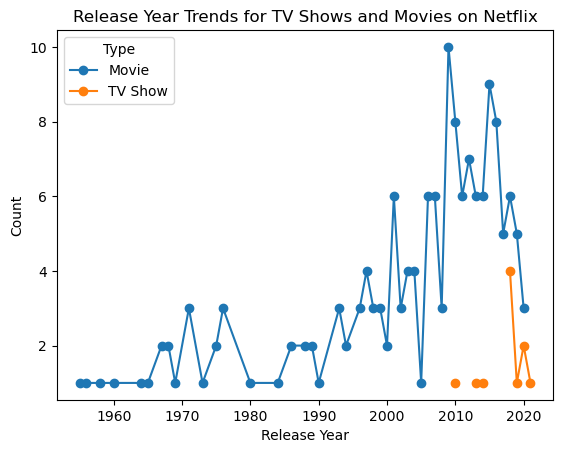

Year with the most TV shows released: 2018
Year with the most movies released: 2009
The line chart illustrates the release year trends for TV shows and movies on Netflix.
The peak year for TV show releases is 2018, and for movies, it is 2009.
Visualization above shows temporal trends of content releases on Netflix,showing peak years for both TV shows and movies.


In [34]:
#Something New
plt.figure(figsize=(12, 8))
release_trends = past_df.groupby(['type', 'release_year']).size().unstack().T
release_trends.plot(kind='line', marker='o')
plt.title('Release Year Trends for TV Shows and Movies on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.show()

#showing the year with the most released tv show and movie
most_released_year = past_df.groupby(['release_year', 'type']).size().unstack().idxmax(axis=0)

print("Year with the most TV shows released:", most_released_year['TV Show'])
print("Year with the most movies released:", most_released_year['Movie'])

# Print statement summarizing the analysis
print("The line chart illustrates the release year trends for TV shows and movies on Netflix.")

# Additional analysis based on the chart
max_tv_shows_year = release_trends['TV Show'].idxmax()
max_movies_year = release_trends['Movie'].idxmax()
print(f"The peak year for TV show releases is {max_tv_shows_year}, and for movies, it is {max_movies_year}.")

# Print a concluding statement
print("Visualization above shows temporal trends of content releases on Netflix,showing peak years for both TV shows and movies.")



In [35]:
#EXTRA VISUALIZATION AND INFO ⬇️

In [36]:
# Convert the 'duration' column to numeric (assuming it contains values like '1 Season' or '90 min')
past_df['duration'] = pd.to_numeric(past_df['duration'].astype(str).str.extract('(\d+)')[0], errors='coerce')

# Find the show with the longest duration
longest_duration_show = past_df.loc[past_df['duration'].idxmax()]

# Displaying the result 
title = longest_duration_show['title']
duration_minutes = longest_duration_show['duration']
formatted_duration = f"{duration_minutes} min" if pd.notna(duration_minutes) else "Unknown"
print(f"Show with Longest Duration: {title} - {formatted_duration}")

Show with Longest Duration: Once Upon a Time in America - 229 min


In [37]:

# Convert the 'duration' column to numeric (assuming it contains values like '1 Season' or '90 min')
past_df['duration'] = pd.to_numeric(past_df['duration'].astype(str).str.extract('(\d+)')[0], errors='coerce')

# Find the show with the shortest duration
shortest_duration_show = past_df.loc[past_df['duration'].idxmin()]

# Displaying the result 
title = shortest_duration_show['title']
duration_minutes = shortest_duration_show['duration']
formatted_duration = f"{duration_minutes} min" if pd.notna(duration_minutes) else "Unknown"
print(f"Show with Shortest Duration: {title} - {formatted_duration}")

Show with Shortest Duration: Ray - 1 min


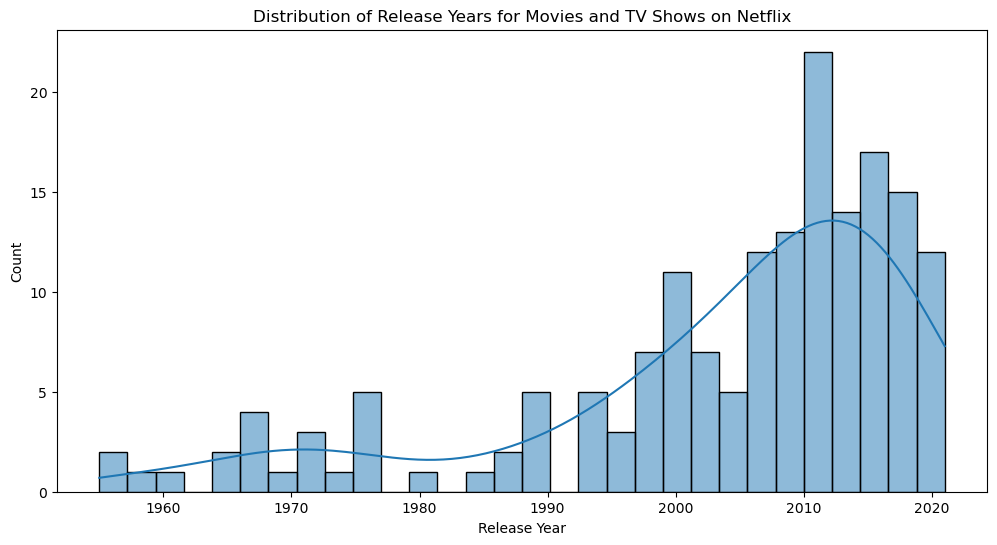

The histogram illustrates the distribution of release years for movies and TV shows on Netflix.
The content on Netflix spans from 1955 to 2021.
There is a concentration of releases around the year 2009.
This visualization provides insights into the temporal distribution of release years for movies and TV shows on Netflix.


In [38]:
# Showing distribution of release years on Netflix
import pandas as pd
plt.figure(figsize=(12, 6))
sns.histplot(past_df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years for Movies and TV Shows on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Print statement summarizing the analysis
print("The histogram illustrates the distribution of release years for movies and TV shows on Netflix.")

# Additional analysis based on the chart
oldest_release_year = past_df['release_year'].min()
latest_release_year = past_df['release_year'].max()
print(f"The content on Netflix spans from {oldest_release_year} to {latest_release_year}.")

#Look for a higher count of releases in a specific period
release_year_mode = past_df['release_year'].mode().iloc[0]
if release_year_mode:
    print(f"There is a concentration of releases around the year {release_year_mode}.")
else:
    print("Netflix content exhibits a relatively uniform distribution of release years.")
    
print("This visualization provides insights into the temporal distribution of release years for movies and TV shows on Netflix.")
